## 29/12/2022

## Box-Cox

In [1]:
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import pandas as pd
import pylab

In [3]:
df=pd.DataFrame({"weight":[12,10,15,16,34,56,26,78,68,12,50,76,45],"height":[123,100,155,160,134,156,126,178,168,180,150,176,120]})
df

,weight,height
0,12,123
1,10,100
2,15,155
3,16,160
4,34,134
5,56,156
6,26,126
7,78,178
8,68,168
9,12,180


- check whether its normally distributed or not?

In [4]:
np.mean(df)

C:\Users\rupan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


weight     38.307692
height    148.153846
dtype: float64

In [5]:
st.mode(df)

ModeResult(mode=array([[ 12, 100]], dtype=int64), count=array([[2, 1]]))

In [6]:
np.median(df)

89.0

In [7]:
for i in df.columns:
    print(i,"--------",df[i].skew())

weight -------- 0.3879780248754408
height -------- -0.4360447685611474


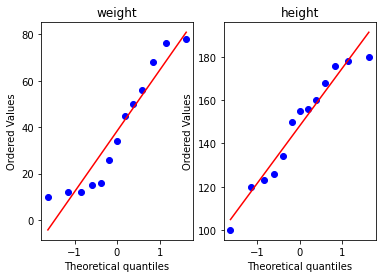

In [8]:
pos=1
for i in df.columns:
    plt.subplot(1,2,pos)
    st.probplot(df[i],dist="norm",plot=pylab);
    plt.title(i)
    pos=pos+1

### apply transformation

In [9]:
from sklearn.preprocessing import PowerTransformer 

In [10]:
pt=PowerTransformer(method="box-cox") ##default method 'yeo-johnson'
tt=pt.fit_transform(df)  ##expected 2-D array
print(tt)

[[-1.21732037 -1.05620653]
 [-1.42778272 -1.76673516]
 [-0.95095624  0.20311513]
 [-0.87206859  0.42876428]
 [ 0.11436277 -0.65916189]
 [ 0.83831087  0.24761598]
 [-0.25086416 -0.95161982]
 [ 1.35310366  1.30648976]
 [ 1.13652554  0.80619655]
 [-1.21732037  1.41036327]
 [ 0.66861387 -0.01468167]
 [ 1.31172256  1.20388976]
 [ 0.5136732  -1.15802967]]


- changing from array to dataframe

In [11]:
df_t=pd.DataFrame(tt,columns=["weight_t","height_t"])
df_t

,weight_t,height_t
0,-1.217320,-1.056207
1,-1.427783,-1.766735
2,-0.950956,0.203115
3,-0.872069,0.428764
4,0.114363,-0.659162
5,0.838311,0.247616
6,-0.250864,-0.951620
7,1.353104,1.306490
8,1.136526,0.806197
9,-1.217320,1.410363


In [12]:
for i in df_t.columns:
    print(i,"--------",df_t[i].skew())

weight_t -------- -0.07248975464725532
height_t -------- -0.1735776482534124


changing 26 to 0 in weight

In [13]:
df=pd.DataFrame({"weight":[12,10,15,16,34,56,0,78,68,12,50,76,45],"height":[123,100,155,160,134,156,126,178,168,180,150,176,120]})
df

,weight,height
0,12,123
1,10,100
2,15,155
3,16,160
4,34,134
5,56,156
6,0,126
7,78,178
8,68,168
9,12,180


In [14]:
pt=PowerTransformer(method="box-cox") ##default method 'yeo-johnson'
tt=pt.fit_transform(df)  ##expected 2-D array
print(tt)

ValueError: The Box-Cox transformation can only be applied to strictly positive data

### showing error because Box-Cox transform Can Only apply to positive data, will apply yeo-johnson

In [15]:
pt=PowerTransformer() ##default method 'yeo-johnson'
tt=pt.fit_transform(df)  ##expected 2-D array
print(tt)

[[-0.83375176 -1.05619279]
 [-0.95493895 -1.76644342]
 [-0.6686181   0.20293709]
 [-0.61714957  0.42861634]
 [ 0.12934747 -0.65926863]
 [ 0.8054914   0.24744223]
 [-1.93699894 -0.95164213]
 [ 1.35714169  1.30665815]
 [ 1.11765006  0.80614584]
 [-0.83375176  1.41058993]
 [ 0.63677408 -0.01486908]
 [ 1.31053887  1.20400489]
 [ 0.48826551 -1.15797842]]


### Standard Normal Distribution

It is the special case of normal distribution or it is extracted from normal distribution whose mean approx equal to 0 and standard deviation approx equal to 1.

- this tranforming concept is called scaling

## Scaling

In [16]:
n=np.random.normal(loc=30,scale=5,size=10000)

In [17]:
z=[]
for x in n:
    z.append((x-30)/5)

In [18]:
np.mean(z) ## close to 0 using standard normal dist/z-score

-0.014800905406053803

In [19]:
np.std(z)

0.9935595067279754

In [20]:
import seaborn as sns

C:\Users\rupan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


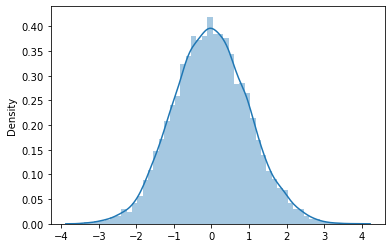

In [21]:
sns.distplot(z);

- Why we need z-score?

1. scaling
2. it tells how far my data point away from mean
3. helps us to find probability
4. helps us to compare the performance with peer group(like in percentile) in same distribution
5. helps us in comparing the performance in different distribution

why we need scaling?

    - from general point of view
    
        . to make the same scale 
        
    - from ML POV:
    
        we will scale the data, so that both magnitudes are same and machine will organize pattern from both POV

- If data is not normally distributed then z-score will not apply, for that we have Min-Max scalar

#### Min-Max Scalar

In [22]:
 l=[150,155,169,170,123,145,146,154,189,165,123,179,167,110,200,200,320,300]

In [23]:
np.mean(l)

175.83333333333334

In [24]:
np.std(l)

53.31484054390693

In [25]:
st.skew(l) ## not normally distributed that's why we applied min-max scaling

1.5638517709030868

In [26]:
m=[]
for i in l:
    scale=(i-min(l))/(max(l)-min(l)) ##formula for min-max
    m.append(scale)

In [27]:
m

[0.19047619047619047,
 0.21428571428571427,
 0.28095238095238095,
 0.2857142857142857,
 0.06190476190476191,
 0.16666666666666666,
 0.17142857142857143,
 0.20952380952380953,
 0.3761904761904762,
 0.2619047619047619,
 0.06190476190476191,
 0.32857142857142857,
 0.2714285714285714,
 0.0,
 0.42857142857142855,
 0.42857142857142855,
 1.0,
 0.9047619047619048]

- How far 165 from the mean?
        
    - Z-score will tell us that`: 165-175/53.3

In [28]:
-10/53.3

-0.1876172607879925

if z-score value is -ve that means that data point is on left side from the mean and if +ve then on right side

- 165 is -0.1876172607879925 standard deviation from mean

- to find how much deviated from mean, we will find z-score

In [29]:
a=[150,151,152,153,152,150,153,153,160,163]

In [30]:
a

[150, 151, 152, 153, 152, 150, 153, 153, 160, 163]

In [31]:
np.std(a)

4.1

In [32]:
np.mean(a)

153.7

### how far 152 from mean in sd?

In [33]:
(152-153.7)/4.1

-0.4146341463414607

- normal distribution is called continuous probability distribution

#### suppose we have an population of 60 year old men. the mean bmi is 29 and sd is 6 . if a man is randomly selected then what is the probabilty  that his bmi will be less than 30

In [34]:
z=(30-29)/6
z
## means bmi of 30 is 0.16 sd from the mean

0.16666666666666666

#### find probabilities using z-score

its p value is 0.567 using z-table which is valid as 0.16 is little greater than 0 in z-score distribution as we expect probability which is light greater than 0.5

100 - 56 = 44%

56% are people whose bmi is less than 30

44% are people whose bmi is greater than or equal to 30

## 02/01/23

#### suppose the scores on a certain college entrance exam are roughly normally distributed with a mean of 82 and a standard deviation of 5.If a certain student received a 90 on the exam. how well he performed in the exam relatively with respect to others. and also tell whether u r in top% or not

### z-score to detect outliers